# Assignment 2: SVD decomposition with applications
### Numerical methods, Fall 2022

In [2]:
#imports
import numpy as np
from sklearn.utils.extmath import randomized_svd
from scipy.sparse.linalg import svds
import sklearn


1. **(10)** In this exercise, we will explore three main algorithms available in scientific python distributions for computation of SVD: `numppy.linalg.svd`, `scipy.sparse.linalg.svds` and `sklearn.utils.extmath.randomized_svd`. To this end:
   * Construct a random $n\times n$ matrix $A$ (with `ii`d elemnts sampled from standard normal distribution); consider $n = 2000$
   * Using these implementations, construct rank-2 approximations to $A$. You will thus obtain three rank-2 matrices $A_\text{svd}$, $A_\text{svds}$ and $A_\text{rsvd}$. Measure the run-time of these three algorithms for the given task.
   * Compute the error norms: $\|A - A_\text{svd}\|_F$, $\|A - A_\text{svds}\|_F$ and $\|A - A_\text{rsvd}\|_F$. Explain the result.

In [25]:
def choose_svd(svdnum, matrix, r=2):
    if svdnum == 0:
        u, s, vh = np.linalg.svd(matrix, full_matrices=False)
        u = u[:, :r]
        s = s[:r]
        vh = vh[:r, :]
        return u * s  @ vh
    elif svdnum == 1:
        u, s, vh = svds(matrix, k=2) 
        return u * s @ vh
    elif svdnum  == 2:
        u, s, vh = randomized_svd(A, n_components=2)
        return u * s @ vh


n = 2000
A = np.random.normal(size=(n,n))


Asvd = choose_svd(0, A)
Asvds = choose_svd(1, A)
Arsvd = choose_svd(2, A)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [28]:
print('numpy svd:')
%timeit choose_svd(0, A)
print('scipy svd:')
%timeit choose_svd(1, A)
print('sklearn svd:')
%timeit choose_svd(2, A)

numpy svd:
3.46 s ± 64.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
scipy svd:
1.04 s ± 87.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
sklearn svd:
285 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [37]:
print(f'fro norm: numpy = {np.linalg.norm(A - Asvd)}, scipy = {np.linalg.norm(A - Asvds)}, sklearn = {np.linalg.norm(A - Arsvd)}')

fro norm: numpy = 1996.9341027058747, scipy = 1996.9341027058747, sklearn = 1997.1554176891507


3. **(10)** Consider the matrix:
   $$ \left[\begin{matrix}-2 & 11 \\ -10 & 5\end{matrix}\right] $$
   * List the singular values, left singular vectors and right singular vectors of $A$. The SVD is not unique, so find the one that has the minimal number of minus signs in $U$ and $V$.
   

  
   * Find the eigenvalues $\lambda_1$, $\lambda_2$ of $A$.

In [37]:
A = np.array([[-2, 11], [-10, 5]])
print(np.linalg.eigvals(A))

[1.5+9.88685997j 1.5-9.88685997j]


* Draw a labeled picture of the unit ball in $\mathbb R^2$ and its image under $A$, together with the singular vectors with the coordinates of their vertices marked.

5. **(10)** In this exercise, you will explore application of SVD to dimensionality reduction. Let us start with loading the dataset:
   ```python
   from sklearn.dataesets import load_digits
   digits = load_digits()
   A = digits.data
   y = digits.target
   ```
   so that rows of $A$ contain monochromatic images of digits (64 float values which should be reshaped into $8\times 8$ images) and $y$ contains the digit labels.
   * Inspect the dataset: plot examples of images, corresponding to several digits (say 0, 3, 7).
   * Normalize the dataset $A$.
   * Use SVD to project the dataset $A$ from 64 dimensions to 2 dimensions. Show the colored scatter plot, where colors encode the digits.

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target

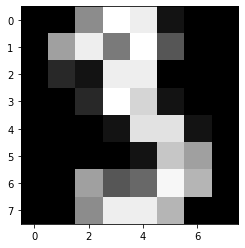

In [77]:
import matplotlib.pyplot as plt
digit1 = A[3]
digit1 = np.reshape(digit1, (8, 8))
digit2 = A[0]
digit2 = np.reshape(digit2, (8, 8))
digit3 = A[7]
digit3 = np.reshape(digit3, (8, 8))
plt.imshow(digit1, cmap='Greys_r')
#цифра 3

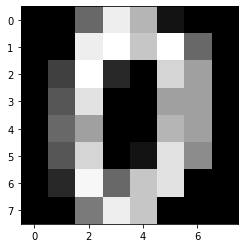

In [76]:
plt.imshow(digit2, cmap='Greys_r')
#цифра 0

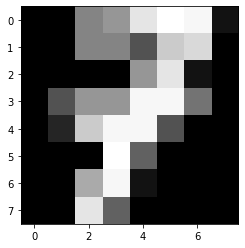

In [78]:
plt.imshow(digit3, cmap='Greys_r')
#цифра 7

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


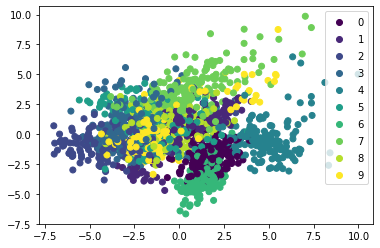

In [93]:
#normalize features
A_norm = sklearn.preprocessing.scale(A, axis=0)

#PCA: A to U * Sigma
#I'll use sklearn svd since it's faster
u,s, _ = randomized_svd(A_norm, n_components=2)
A_norm_2 = u * s

plot = plt.scatter(A_norm_2[:, 0], A_norm_2[:, 1], c = y)
plt.legend(*plot.legend_elements())